# Hipotesis Testing

In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import random
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [3]:
sns.set(rc = {'figure.figsize':(13, 7.5)})

In [4]:
np.random.seed(42)

normal_distribution_male_mass_pound = np.random.normal(loc=181, scale=24, size=6000)

In [5]:
normal_distribution_feale_mass_pound = np.random.normal(loc=132, scale=24, size=6500)

In [6]:
all_mass_value = np.concatenate((normal_distribution_male_mass_pound, normal_distribution_feale_mass_pound), axis=0)

In [7]:
df_ppl_mass = pd.DataFrame(data={'mass_pounds':all_mass_value})

In [8]:
df_ppl_mass.head()

,mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


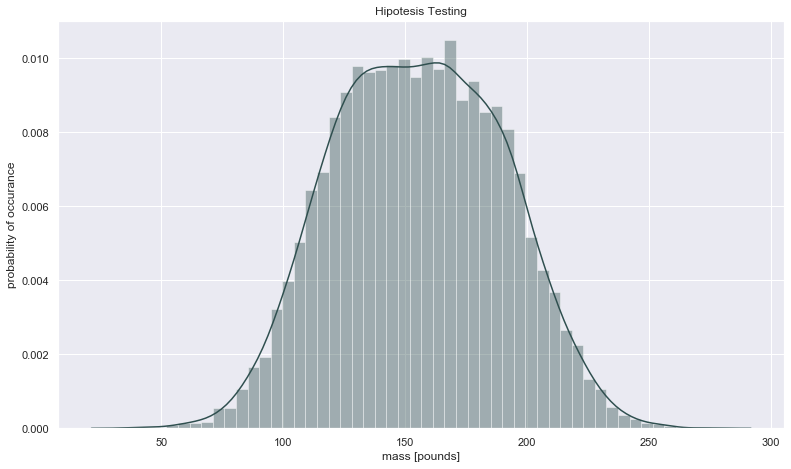

In [9]:
sns.distplot(df_ppl_mass['mass_pounds'], color='darkslategrey')
plt.xlabel('mass [pounds]')
plt.ylabel('probability of occurance')
plt.title('Hipotesis Testing')
plt.show()

In [10]:
print('Calculate Population Mean')

pop_mean_mass = df_ppl_mass['mass_pounds'].mean()
pop_mean_mass

Calculate Population Mean


155.41775679950234

In [11]:
print('Calculate Population Standart Deviation')

pop_std_dev_mass = df_ppl_mass['mass_pounds'].std()
pop_std_dev_mass

Calculate Population Standart Deviation


34.29475464088143

In [12]:
print('Sample 25 orang, 300 kali sampling')

sample_means = []
n = 25

for sample in range(0, 300):
    #random values
    sample_values = np.random.choice(a=df_ppl_mass['mass_pounds'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

Sample 25 orang, 300 kali sampling


In [13]:
sample_means

[152.57384109015214,
 163.72207129987416,
 152.09934660338203,
 163.5220270795167,
 165.80193865727776,
 159.26748778839624,
 147.23902164776143,
 161.52797105677445,
 153.1713625435935,
 172.16957824669547,
 148.22785325869594,
 158.87051799985417,
 161.74928755167588,
 155.78508606367348,
 157.08804177789554,
 148.76470320918835,
 152.22300662311022,
 155.19672252177403,
 151.81855839277705,
 165.68419552738018,
 155.26693636984385,
 147.8493365052109,
 150.67454047698385,
 161.837560005383,
 152.51355569762814,
 153.1857293693521,
 168.64443797967888,
 149.5508582151484,
 147.9814613618473,
 152.21710938656054,
 151.4169962407979,
 157.73669434986905,
 152.03409081988735,
 158.37016143662512,
 146.72483066639467,
 157.3368436743143,
 156.1274936597146,
 152.6210242246142,
 169.2562798613477,
 155.354705540798,
 152.96430317517687,
 142.87152633148347,
 163.36023180700278,
 154.95761841808655,
 169.04449363207706,
 155.73285410288517,
 153.86328685874395,
 149.5140732772208,
 158.954

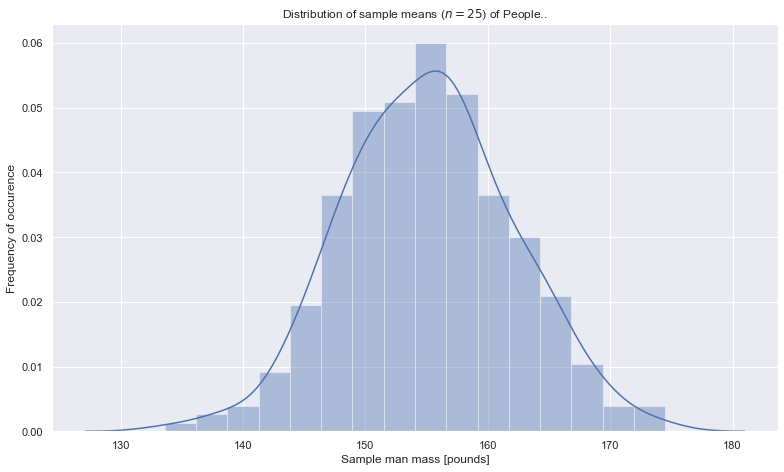

In [14]:
sns.distplot(sample_means)
plt.title('Distribution of sample means ($n=25$) of People..')
plt.xlabel('Sample man mass [pounds]')
plt.ylabel('Frequency of occurence')

plt.show()

In [15]:
# Calculate Sample Means

mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

155.13455903172712

In [16]:
# Calculate Std dev of sample means

std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.8922068970169095

In [17]:
# Calculate Std Error

standart_error = pop_std_dev_mass/np.sqrt(n)
standart_error

6.858950928176286

In [18]:
gye_sample_mean = 163

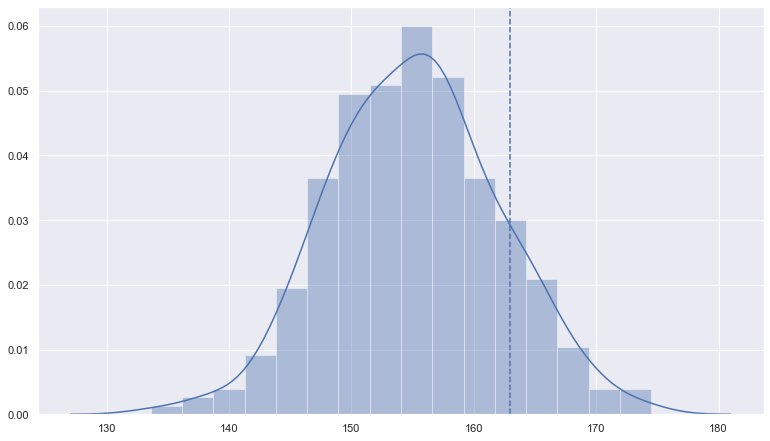

In [19]:
# Visualize gye sample means to sampling distribution

sns.distplot(sample_means)
plt.axvline(x = gye_sample_mean, linestyle='--', label='sample mean of ppl at gye')
plt.title = ('Distribution of Sample Mean')
plt.xlabel = ('trial')
plt.ylabel = ('trial')

plt.show()

In [20]:
lower_CI = mean_of_sample_means - 1.96*standart_error

In [21]:
upper_CI = mean_of_sample_means + 1.96*standart_error

In [22]:
print(lower_CI)
print(upper_CI)
print(pop_mean_mass)

141.6910152125016
168.57810285095263
155.41775679950234


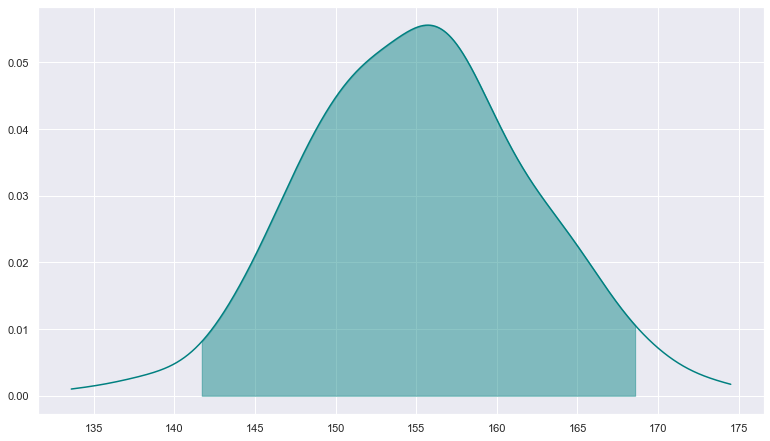

In [23]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_CI, upper_CI, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')

In [24]:
# Probability DIsribution

In [25]:
#uniform

In [26]:
from scipy.stats import uniform

In [27]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

TypeError: 'str' object is not callable

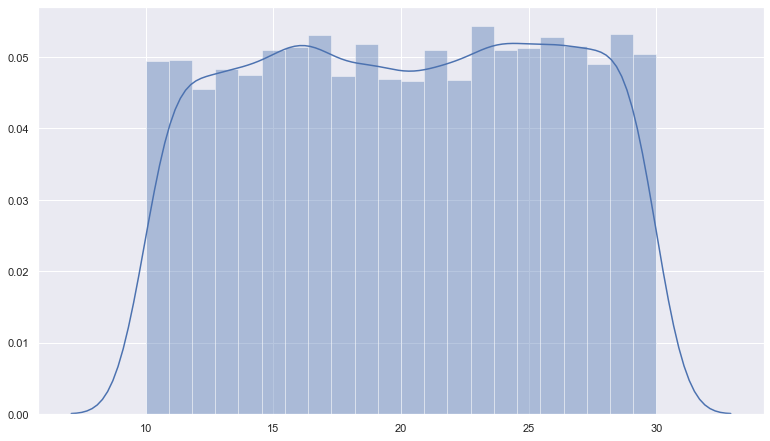

In [29]:
sns.distplot(data_uniform)
plt.title('Uniform Dsitribution')
plt.ylabel('frequency')
plt.show()

In [30]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000, p=0.6)

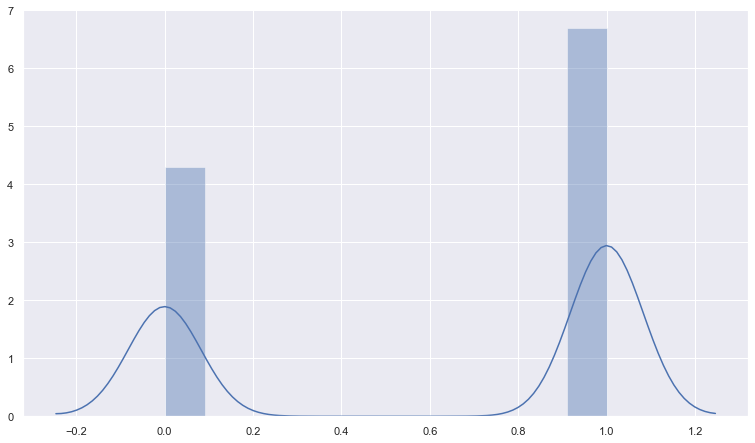

In [31]:
sns.distplot(data_bern)

In [32]:
from scipy.stats import binom
data_binom = binom.rvs(n=10, p=0.4, size=10000)

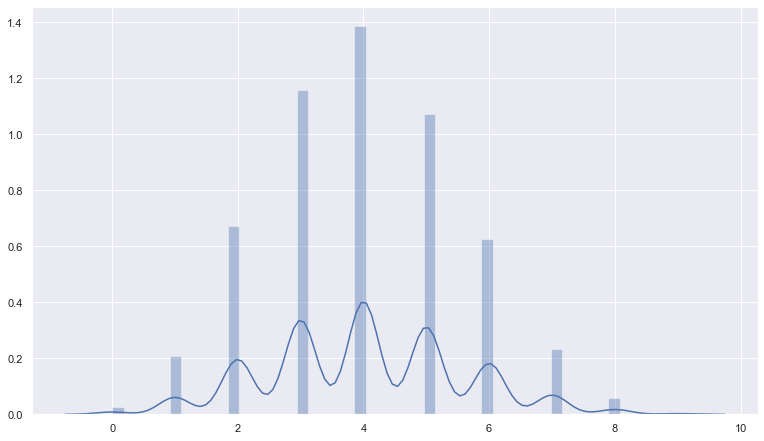

In [33]:
sns.distplot(data_binom)

In [34]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

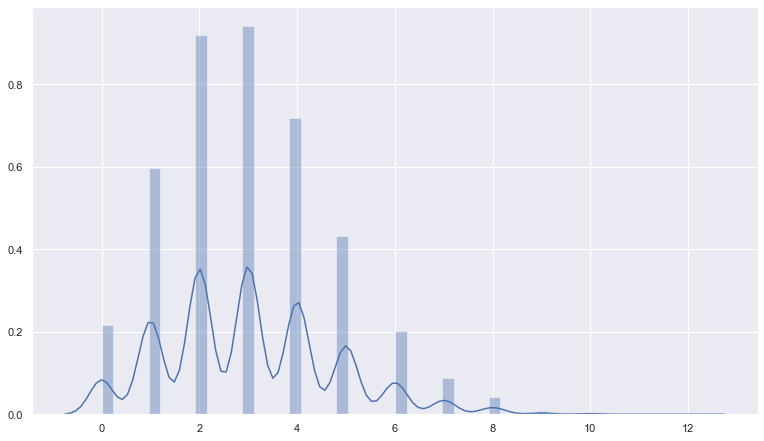

In [35]:
sns.distplot(data_poisson)

In [36]:
from scipy.stats import norm
data_normal = norm.rvs(size=10000, loc=9, scale=1)

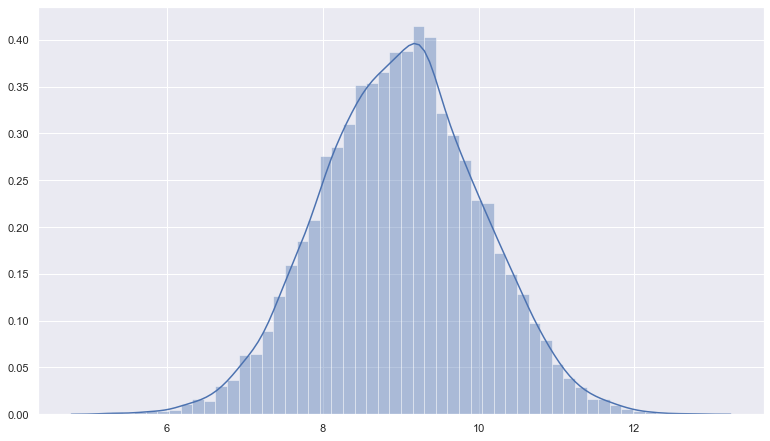

In [37]:
sns.distplot(data_normal)

In [38]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1, loc=0, size=10000)

TypeError: 'str' object is not callable

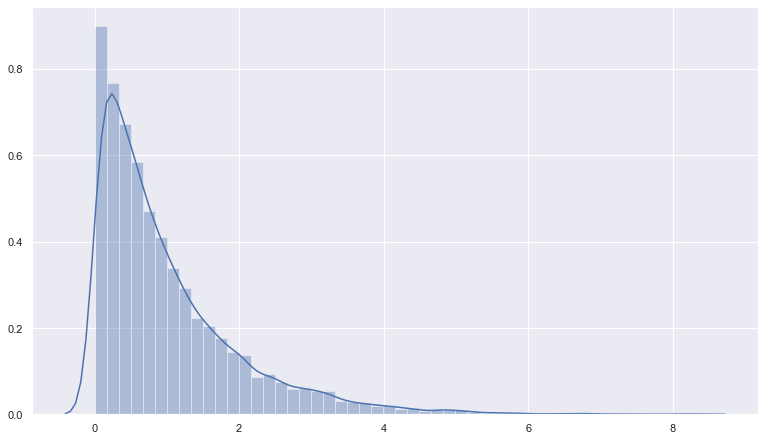

In [39]:
sns.distplot(data_expon)
plt.title('Exponetial Distribution')
ply.ylabel('frequency')
plt.show()

In [49]:
# Hyppothesis Testing

In [50]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [51]:
import statsmodels.api as sm

In [52]:
da.head()

NameError: name 'da' is not defined

In [53]:
females = da[
    da['RIAGENDR'] == 2    
]

males = da[
    da['RIAGENDR'] == 1    
]

NameError: name 'da' is not defined

In [54]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

NameError: name 'females' is not defined

In [55]:
n2 = len(males)
mu2 = males["BMXBMI"].mean()
sd2 = males["BMXBMI"].std()

(n2, mu2, sd2)

NameError: name 'males' is not defined

In [56]:
sm.stats.ztest(females['BMXBMI'].dropna(), males['BMXBMI'].dropna(), alternative='two-sided')

NameError: name 'females' is not defined

In [ ]:
plt.hist(females['BMXBMI'].dropna(), color='pink', bins=25)
plt.show()

In [57]:
plt.hist(males['BMXBMI'].dropna(), color='blue', bins=25)
plt.show()

NameError: name 'males' is not defined